# 第三章 kNN
1. 用于分类与回归的简单方法，基本做法是：对给定的训练实例点和输入实例点，确定训练实例点和输入实例点，首先确定输入实例点的k个最邻近训练实例点，然后利用这k个训练实例点的类的多数来预测输入实例点的类。
2. 基于训练数据对特征空间进行的一个划分。k近邻法中，当训练集、距离度量、k值及分类决策规则确定后，其结果是唯一确定的。
3. 三要素：距离度量、k值的选择、分类决策规则。k值小，模型复杂，k值大，模型简单。k值反应了对近似误差与估计误差之间的权衡。通常使用交叉验证选择最优的k。常用的分类决策规则是多数表决，对应于经验最小误差。
4. k邻近的实现需要考虑如何快速搜索k个最近临近点。kd树是一种便于对k维空间中的数据进行快速检索的数据结构。kd树是二叉树，表示对k维空间的一个划分，其每个节点对应于k维空间划分中的一个超矩形区域。利用kd树可以省去对大部分数据点的搜索，从而减少搜索的计算量。


In [3]:
# 距离度量
import math
from itertools import combinations

def L_computer(x, y, p=1):
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    else:
        return 0

x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]
for i in range(1, 5):
    r = {'1-{}'.format(c): L_computer(x1, c, p=i) for c in [x2, x3]}
    print(min(zip(r.values(), r.keys())))

(4.0, '1-[5, 1]')
(4.0, '1-[5, 1]')
(3.7797631496846193, '1-[4, 4]')
(3.5676213450081633, '1-[4, 4]')


In [7]:
# 遍历所有数据点，找出n个距离最近的点的分类情况，少数服从多数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

#data 
iris = load_iris() #加载花卉数据
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [8]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


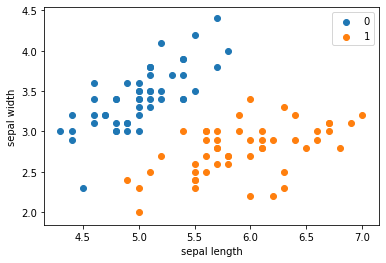

In [10]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [37]:
data = np.array(df.iloc[:100, [0, 1, -1]])
x, y = data[:,:-1], data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
class KNN:
    def __init__(self, x_train, y_train, n_neighbors=3, p=2):
        self.n = n_neighbors
        self.p = p
        self.x_train = x_train
        self.y_train = y_train
    def predict(self, x):
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(x - self.x_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
        for i in range(self.n, len(self.x_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(x - self.x_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        # 统计
        knn = [k[-1] for k in knn_list]
        count_pair = Counter(knn)
        # print(dict(count_pair))
        max_count = sorted(count_pair.items(), key=lambda x : x[1])[-1][0]
        return max_count
    def score(self, x_test, y_test):
        right_count = 0
        n = 10
        for x, y in zip(x_test, y_test):
            label = self.predict(x)
            if label == y:
                right_count += 1
        return right_count / len(x_test)

In [39]:
clf = KNN(x_train, y_train)
clf.score(x_test, y_test)

0.95

In [40]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


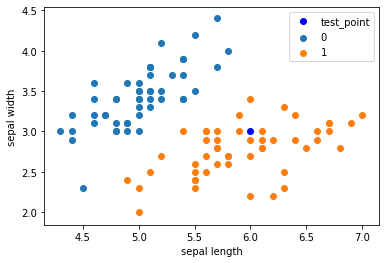

In [41]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf_sk = KNeighborsClassifier()
clf_sk.fit(x_train, y_train)
clf_sk.score(x_test, y_test)

1.0

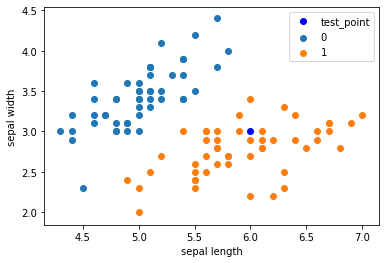

In [44]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## kd树
kd树是一种对k维空间中的实例点进行存储以便对其进行快速检索的树形结构

kd树是二叉树，表示k维空间的一个划分。构造kd树相当于不断地用垂直于坐标轴地超平面将k维空间进行切分。构造一系列地k维超矩阵区域。kd树地每个节点对应于一个k维超矩形区域。

构造方法：

构造根节点，使根结点对应于k维空间中包含所有实例点地矩形区域。通过下面地递归方法不断地切分，生成子节点。在结点上选择一个坐标轴和此坐标轴上地一个切分点，确定一个超平面，这个超平面通过选定地切分点并垂直于选定地坐标轴，将当前的超矩形区域分为左右两个子区域（子节点）；这个过程直到子区域内没有实例时终止。在此过程中，将实例保存在相应的结点上。

通常，依次选择坐标轴对空间切分，选择训练实例点在选定坐标轴上的中位数为切分点，这样得到的kd树是平衡的。平衡的kd树效率未必是最优的。

## 构造平衡kd树
输入：k维空间数据集$T=\{x_1, x_2,...,x_N\}$。其中$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(k)}\right)^{\mathrm{T}}$ ，$i＝1,2,…,N$；

输出：kd树

（1）开始：构造根结点，根结点对应于包含$T$的$k$维空间的超矩形区域。

选择$x^{(1)}$为坐标轴，以T中所有实例的$x^{(1)}$坐标的中位数为切分点，将根结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

由根结点生成深度为1的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域， 右子结点对应于坐标$x^{(1)}$大于切分点的子区域。

将落在切分超平面上的实例点保存在根结点。

（2）重复：对深度为$j$的结点，选择$x^{(1)}$为切分的坐标轴，$l＝j(modk)+1$，以该结点的区域中所有实例的$x^{(1)}$坐标的中位数为切分点，将该结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

由该结点生成深度为$j+1$的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域，右子结点对应坐标$x^{(1)}$大于切分点的子区域。

将落在切分超平面上的实例点保存在该结点。

（3）直到两个子区域没有实例存在时停止。从而形成**kd**树的区域划分。


In [12]:
# kd树每个节点中主要包含的数据如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt # k维向量节点（k维空间中的一个样本点）
        self.split = split
        self.left = left
        self.right = right

class KdTree(object):
    def __init__(self, data):
        k = len(data[0]) # 数据维度
        
        def CreateNode(split, data_set):
            # 按第split维划分数据集，创建KdNode
            if not data_set:
                return None
            data_set.sort(key=lambda x : x[split])
            split_pos = len(data_set) // 2
            median = data_set[split_pos] # 中位数分割点
            split_next = (split + 1) % k
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]), # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:])) # 创建右子树
        self.root = CreateNode(0, data) #从第0维分量开始构建kd树，返回根节点

# kd树的前序遍历
def preOrder(root):
    print(root.dom_elt)
    if root.left:
        preOrder(root.left)
    if root.right:
        preOrder(root.right)

In [13]:
# 对构建好的kd树进行搜索，寻找和目标点最接近的样本点
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple 分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple",
                  "nearest_point nearest_dist nodes_visited")

def find_nearest(tree, point):
    k = len(point) #数据维度
    
    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"), 0)
        nodes_visited = 1
        s = kd_node.split
        pivot = kd_node.dom_elt
        if target[s] <= pivot[s]:
            nearer_node = kd_node.left # 下一个访问节点是左子树
            further_node = kd_node.right # 同时记录下右子树
        else:
            nearer_node = kd_node.right
            further_node = kd_node.left
        templ = travel(nearer_node, target, max_dist)
        nearest = templ.nearest_point
        dist = templ.nearest_dist
        nodes_visited += templ.nodes_visited
        if dist < max_dist:
            max_dist = dist # 最近点在以目标点为球心，max_dist为半径的超球体内
        temp_dist = abs(pivot[s] - target[s])
        if max_dist <= temp_dist: #判断超球体是否于超平面相交，不相交可以直接返回
            return result(nearest, dist, nodes_visited)
        
        # 计算目标点于分割点的欧式距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))
        
        if temp_dist < dist: #如果距离更近
            nearest = pivot
            dist = temp_dist
            max_dist = dist
        
        # 检查另一个子节点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)
        
        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:
            nearest = temp2.nearest_point
            dist = temp2.nearest_dist
        return result(nearest, dist, nodes_visited)
    return travel(tree.root, point, float("inf"))

In [14]:
data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]
kd = KdTree(data)
preOrder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [15]:
from time import clock
from random import random

# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]
# 产生n个k维随机向量
def random_points(k, n):
    return [random_point(k) for _ in range(n)]

In [17]:
ret = find_nearest(kd, [3, 4.5])
print(ret)

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [18]:
N = 30000
t0 = clock()
kd2 = KdTree(random_points(3, N))
ret2 = find_nearest(kd2, [0.1, 0.5, 0.8])
t1 = clock()
print('times: ', t1-t0, "s")
print(ret2)

times:  0.15785060000007434 s
Result_tuple(nearest_point=[0.09775264344215207, 0.5103407402114444, 0.8163356585805981], nearest_dist=0.019463690833974714, nodes_visited=49)


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


## 习题3.1
参照图3.1， 在二维空间中给出实例点，画出k为1和2时的k近邻构成的空间划分，并对其进行比较，体会k值选择于模型复杂度及预测准确率的关系。

In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

data = np.array([[5, 12, 1], [6, 21, 0], [14, 5, 0], [16, 10, 0], [13, 19, 0],
                 [13, 32, 1], [17, 27, 1], [18, 24, 1], [20, 20,
                                                         0], [23, 14, 1],
                 [23, 25, 1], [23, 31, 1], [26, 8, 0], [30, 17, 1],
                 [30, 26, 1], [34, 8, 0], [34, 19, 1], [37, 28, 1]])
X_train = data[:, 0:2]
y_train = data[:, 2]

models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
         KNeighborsClassifier(n_neighbors=2, n_jobs=-1))

models = (clf.fit(X_train, y_train) for clf in models)

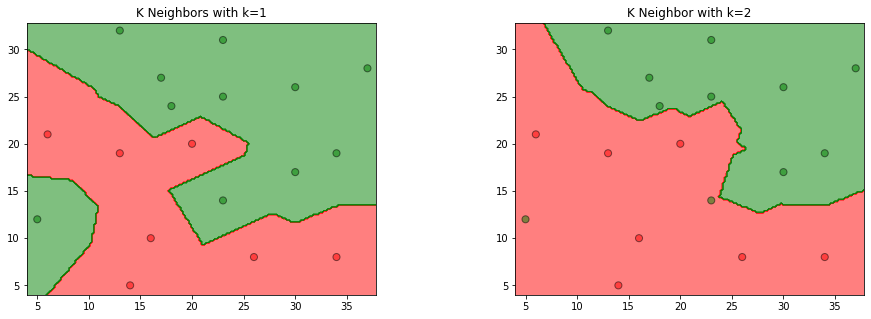

In [28]:
titles = ('K Neighbors with k=1', 'K Neighbor with k=2')

fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                    np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 2).flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Z))])
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)

plt.show()


## 习题3.2
利用例题3.2构造的kd树求点$x=(3,4.5)^T$的最邻近点

In [34]:
import numpy as np
from sklearn.neighbors import KDTree

train_data = np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)])
tree = KDTree(train_data, leaf_size=2)
dist, ind = tree.query(np.array([(3, 4.5)]), k=1)
x1 = train_data[ind[0]][0][0]
x2 = train_data[ind[0]][0][1]

print(ind[0])
print('x点的最近邻接点({0}, {1})'.format(x1, x2))

[0]
x点的最近邻接点(2, 3)


# 习题3.3
写出输出为x的k邻近算法

算法：使用kd树的k邻近搜索
输入：已构造的kd树，目标点x
输出：x的最近邻

1. 在kd树中找出包含目标点x的叶节点：从根节点出发，递归的向下访问树，若目标点x当前维的坐标小于切分点的坐标，移动到左子树，否则移动到右子树，直到子节点为叶子节点。
2. 如果当前k近邻点集元素数量小于k或者叶节点距离小于当前k近邻集中的最远距离，那么将叶节点插入当前k近邻集
3. 递归后退，在每个节点做一下操作：

如果当前k近邻集元素数量小于k或者当前节点距离小于当前k近邻集中最远距离，那么将该节点加入到当前k近邻集

检查另一个节点对应的区域是否与以目标点为球心、以目标点与当前k邻近集中最远点的距离为半径的超球体相交。如果相交，可能在另一个节点对应的区域内存在距目标点更近的点，移动到另一个节点，接着递归的进行最邻近搜索，如果不相交，向上后退。
4. 当退回到根节点，搜索结束，最后当前k近邻点集即为x的最近邻点。

In [5]:
# 构建kd树

from collections import namedtuple
import numpy as np

# 建立节点类
class Node(namedtuple("Node", "location left_child right_child")):
    def __repr__(self):
        return str(tuple(self))

# kd-tree
class KdTree():
    def __init__(self, k=1):
        self.k = k
        self.kdtree = None
        
    # 构造kd-tree
    def _fit(self, X, depth=0):
        try:
            k = self.k
        except IndexError as e:
            return None
        axis = depth % k
        X = X[X[:, axis].argsort()] # argsort() 返回数组从小到大的索引值
        median = X.shape[0] // 2
        try:
            X[median]
        except IndexError:
            return None
        return Node(location=X[median],
                   left_child=self._fit(X[:median], depth + 1),
                   right_child=self._fit(X[median + 1:], depth + 1))
    
    def _search(self, point, tree=None, depth=0, best=None):
        if tree is None:
            return best
        k = self.k
        if point[0][depth % k] < tree.location[depth % k]:
            next_branch = tree.left_child
        else:
            next_branch = tree.right_child
        if not next_branch is None:
            best = next_branch.location
        return self._search(point,
                           tree=next_branch,
                           depth=depth + 1,
                           best=best)
    
    def fit(self, X):
        self.kdtree = self._fit(X)
        return self.kdtree
    
    def predict(self, X):
        res = self._search(X, self.kdtree)
        return res

In [7]:
KNN = KdTree()
X_train = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
KNN.fit(X_train)
X_new = np.array([[3, 4.5]])
res = KNN.predict(X_new)

print(res)
x1 = res[0]
x2 = res[1]

print("x点的最近邻接点时({0}, {1})".format(x1, x2))

[2 3]
x点的最近邻接点时(2, 3)
